<div class="span5 alert alert-success">

### Pre-processing & Training Data Development

Date: 2025-03-05 </br>
Author: Sandy Liu </br>

##### Poject Objectives:<br>
Create a cleaned development dataset you can use to complete the modeling step of your project. </br>


 **Techniques** <br>
 - Convert categorical data to dummy variables
 - Standardize numerical features
 - Split the data into training and testing sets




</div>


In [1]:
# load the data
import pandas as pd
df = pd.read_csv('../EDA/coffee_data_converted_cleaned.csv')



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     1580 non-null   object 
 1   roaster                   1580 non-null   object 
 2   score                     1580 non-null   int64  
 3   Roaster Location          1580 non-null   object 
 4   Coffee Origin             1580 non-null   object 
 5   Roast Level               1580 non-null   object 
 6   Agtron                    1580 non-null   object 
 7   Est. Price                1580 non-null   object 
 8   Review Date               1580 non-null   object 
 9   Aroma                     1580 non-null   float64
 10  Acidity/Structure         1580 non-null   float64
 11  Body                      1580 non-null   int64  
 12  Flavor                    1580 non-null   int64  
 13  Aftertaste                1580 non-null   float64
 14  coffee_n

In [2]:
df.head()


,title,roaster,score,Roaster Location,Coffee Origin,Roast Level,Agtron,Est. Price,Review Date,Aroma,...,is_blend,Est. Price USD,Latitude,Longitude,January_Avg_Temp,January_Precipitation,July_Avg_Temp,July_Precipitation,Est. Price USD_per_ounce,region
0,Wilton Benitez Colombia Yellow Bourbon,JBC Coffee Roasters,96,"Madison, Wisconsin","Piendamó, Cauca, Colombia",Light,63/88,$22.00/8 ounces,February 2025,9.0,...,0,22.00/8 ounces,43.074761,-89.383761,1.2,1.3,23.0,3.6,2.75,NaN
1,Colombia Chachagüí Mild Roast,Rusty Dog Coffee,93,"Madison, Wisconsin","Chachagüí, Nariño Department, Colombia",Medium-Light,59/77,$21.00/12 ounces,February 2025,9.0,...,0,21.00/12 ounces,43.074761,-89.383761,1.2,1.3,23.0,3.6,1.75,NaN
2,Colombia Chachagüí Mild Roast,Rusty Dog Coffee,93,"Madison, Wisconsin","Chachagüí, Nariño Department, Colombia",Medium-Light,59/77,$21.00/12 ounces,February 2025,9.0,...,0,21.00/12 ounces,43.074761,-89.383761,1.2,1.3,23.0,3.6,1.75,NaN
3,Murundo People’s Farm Rwanda,JBC Coffee Roasters,93,"Madison, Wisconsin","Nyamasheke District, Western Province, Rwanda",Medium-Light,57/79,$20.00/12 ounces,February 2025,9.0,...,0,20.00/12 ounces,43.074761,-89.383761,1.2,1.3,23.0,3.6,1.67,africa_arabia
4,Murundo People’s Farm Rwanda,JBC Coffee Roasters,93,"Madison, Wisconsin","Nyamasheke District, Western Province, Rwanda",Medium-Light,57/79,$20.00/12 ounces,February 2025,9.0,...,0,20.00/12 ounces,43.074761,-89.383761,1.2,1.3,23.0,3.6,1.67,africa_arabia


1. Date should be converted to datetime:
- Review Date


2. Need to convert to numeric
- Agtron (Need to separate whole-bean_Agtron and ground-bean_Agtron)
For example: 
59/77 which means whole-bean_Agtron is 59 and ground-bean_Agtron is 77


In [3]:
# Covert date to datetime
df['Review Date'] = pd.to_datetime(df['Review Date'])


# Convert Agtron to numeric
df['whole-bean_Agtron'] = df['Agtron'].str.split('/').str[0].astype(float)
df['ground-bean_Agtron'] = df['Agtron'].str.split('/').str[1].astype(float)


df.head()

/var/folders/ym/cnwhpvr13b10x0g3j5y5kn9w0000gn/T/ipykernel_85598/801541547.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Review Date'] = pd.to_datetime(df['Review Date'])


,title,roaster,score,Roaster Location,Coffee Origin,Roast Level,Agtron,Est. Price,Review Date,Aroma,...,Latitude,Longitude,January_Avg_Temp,January_Precipitation,July_Avg_Temp,July_Precipitation,Est. Price USD_per_ounce,region,whole-bean_Agtron,ground-bean_Agtron
0,Wilton Benitez Colombia Yellow Bourbon,JBC Coffee Roasters,96,"Madison, Wisconsin","Piendamó, Cauca, Colombia",Light,63/88,$22.00/8 ounces,2025-02-01,9.0,...,43.074761,-89.383761,1.2,1.3,23.0,3.6,2.75,NaN,63.0,88.0
1,Colombia Chachagüí Mild Roast,Rusty Dog Coffee,93,"Madison, Wisconsin","Chachagüí, Nariño Department, Colombia",Medium-Light,59/77,$21.00/12 ounces,2025-02-01,9.0,...,43.074761,-89.383761,1.2,1.3,23.0,3.6,1.75,NaN,59.0,77.0
2,Colombia Chachagüí Mild Roast,Rusty Dog Coffee,93,"Madison, Wisconsin","Chachagüí, Nariño Department, Colombia",Medium-Light,59/77,$21.00/12 ounces,2025-02-01,9.0,...,43.074761,-89.383761,1.2,1.3,23.0,3.6,1.75,NaN,59.0,77.0
3,Murundo People’s Farm Rwanda,JBC Coffee Roasters,93,"Madison, Wisconsin","Nyamasheke District, Western Province, Rwanda",Medium-Light,57/79,$20.00/12 ounces,2025-02-01,9.0,...,43.074761,-89.383761,1.2,1.3,23.0,3.6,1.67,africa_arabia,57.0,79.0
4,Murundo People’s Farm Rwanda,JBC Coffee Roasters,93,"Madison, Wisconsin","Nyamasheke District, Western Province, Rwanda",Medium-Light,57/79,$20.00/12 ounces,2025-02-01,9.0,...,43.074761,-89.383761,1.2,1.3,23.0,3.6,1.67,africa_arabia,57.0,79.0


In [4]:
# check the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns.tolist())

Categorical Columns: ['title', 'roaster', 'Roaster Location', 'Coffee Origin', 'Roast Level', 'Agtron', 'Est. Price', 'coffee_name', 'coffee_review_url', 'coffee_brand_url', 'Est. Price USD', 'region']


First: the categorical variables are:
['title', 'roaster', 'Coffee Origin', 'Agtron', 'Est. Price', 'coffee_name', 'coffee_review_url', 'coffee_brand_url', 'Est. Price USD']

Second:
- However, the 'Agtron' is already converted to 2 columns: 'whole-bean_Agtron' and 'ground-bean_Agtron'
- Column 'Est. Price' is already converted to numeric 'Est. Price USD_per_ounce'
- Also, 'coffee_region' is already converted to hot-encode 'region_africa_arabia', 'region_caribbean', ' region_central_america', 'region_hawaii ', 'region_asia_pacific'


- Not helpful columns:
- coffee_review_url
- coffee_brand_url
- Est. Price USD
- Agtron
- coffee region


So, columns that needs to be converted to dummy variables are :
'roaster'
'Roster Location'
'Roast Level'






In [5]:
df_new = df.drop(columns=['coffee_review_url', 'coffee_brand_url', 'Est. Price', 'Agtron', 'Coffee Origin'])
df_new.head()


,title,roaster,score,Roaster Location,Roast Level,Review Date,Aroma,Acidity/Structure,Body,Flavor,...,Latitude,Longitude,January_Avg_Temp,January_Precipitation,July_Avg_Temp,July_Precipitation,Est. Price USD_per_ounce,region,whole-bean_Agtron,ground-bean_Agtron
0,Wilton Benitez Colombia Yellow Bourbon,JBC Coffee Roasters,96,"Madison, Wisconsin",Light,2025-02-01,9.0,9.0,9,10,...,43.074761,-89.383761,1.2,1.3,23.0,3.6,2.75,NaN,63.0,88.0
1,Colombia Chachagüí Mild Roast,Rusty Dog Coffee,93,"Madison, Wisconsin",Medium-Light,2025-02-01,9.0,8.0,9,9,...,43.074761,-89.383761,1.2,1.3,23.0,3.6,1.75,NaN,59.0,77.0
2,Colombia Chachagüí Mild Roast,Rusty Dog Coffee,93,"Madison, Wisconsin",Medium-Light,2025-02-01,9.0,8.0,9,9,...,43.074761,-89.383761,1.2,1.3,23.0,3.6,1.75,NaN,59.0,77.0
3,Murundo People’s Farm Rwanda,JBC Coffee Roasters,93,"Madison, Wisconsin",Medium-Light,2025-02-01,9.0,8.0,9,9,...,43.074761,-89.383761,1.2,1.3,23.0,3.6,1.67,africa_arabia,57.0,79.0
4,Murundo People’s Farm Rwanda,JBC Coffee Roasters,93,"Madison, Wisconsin",Medium-Light,2025-02-01,9.0,8.0,9,9,...,43.074761,-89.383761,1.2,1.3,23.0,3.6,1.67,africa_arabia,57.0,79.0


In [6]:
# Create dummy or indicator features for categorical variables
df_new = pd.get_dummies(df_new, columns=['Roast Level'])

df_new.head()



,title,roaster,score,Roaster Location,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,...,July_Precipitation,Est. Price USD_per_ounce,region,whole-bean_Agtron,ground-bean_Agtron,Roast Level_Dark,Roast Level_Light,Roast Level_Medium,Roast Level_Medium-Dark,Roast Level_Medium-Light
0,Wilton Benitez Colombia Yellow Bourbon,JBC Coffee Roasters,96,"Madison, Wisconsin",2025-02-01,9.0,9.0,9,10,9.0,...,3.6,2.75,NaN,63.0,88.0,False,True,False,False,False
1,Colombia Chachagüí Mild Roast,Rusty Dog Coffee,93,"Madison, Wisconsin",2025-02-01,9.0,8.0,9,9,8.0,...,3.6,1.75,NaN,59.0,77.0,False,False,False,False,True
2,Colombia Chachagüí Mild Roast,Rusty Dog Coffee,93,"Madison, Wisconsin",2025-02-01,9.0,8.0,9,9,8.0,...,3.6,1.75,NaN,59.0,77.0,False,False,False,False,True
3,Murundo People’s Farm Rwanda,JBC Coffee Roasters,93,"Madison, Wisconsin",2025-02-01,9.0,8.0,9,9,8.0,...,3.6,1.67,africa_arabia,57.0,79.0,False,False,False,False,True
4,Murundo People’s Farm Rwanda,JBC Coffee Roasters,93,"Madison, Wisconsin",2025-02-01,9.0,8.0,9,9,8.0,...,3.6,1.67,africa_arabia,57.0,79.0,False,False,False,False,True


In [7]:
# Convert boolean to numeric
roast_cols = ['Roast Level_Dark', 'Roast Level_Light', 'Roast Level_Medium', 
              'Roast Level_Medium-Dark', 'Roast Level_Medium-Light']

df_new[roast_cols] = df_new[roast_cols].astype(int)

df_new.head()

,title,roaster,score,Roaster Location,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,...,July_Precipitation,Est. Price USD_per_ounce,region,whole-bean_Agtron,ground-bean_Agtron,Roast Level_Dark,Roast Level_Light,Roast Level_Medium,Roast Level_Medium-Dark,Roast Level_Medium-Light
0,Wilton Benitez Colombia Yellow Bourbon,JBC Coffee Roasters,96,"Madison, Wisconsin",2025-02-01,9.0,9.0,9,10,9.0,...,3.6,2.75,NaN,63.0,88.0,0,1,0,0,0
1,Colombia Chachagüí Mild Roast,Rusty Dog Coffee,93,"Madison, Wisconsin",2025-02-01,9.0,8.0,9,9,8.0,...,3.6,1.75,NaN,59.0,77.0,0,0,0,0,1
2,Colombia Chachagüí Mild Roast,Rusty Dog Coffee,93,"Madison, Wisconsin",2025-02-01,9.0,8.0,9,9,8.0,...,3.6,1.75,NaN,59.0,77.0,0,0,0,0,1
3,Murundo People’s Farm Rwanda,JBC Coffee Roasters,93,"Madison, Wisconsin",2025-02-01,9.0,8.0,9,9,8.0,...,3.6,1.67,africa_arabia,57.0,79.0,0,0,0,0,1
4,Murundo People’s Farm Rwanda,JBC Coffee Roasters,93,"Madison, Wisconsin",2025-02-01,9.0,8.0,9,9,8.0,...,3.6,1.67,africa_arabia,57.0,79.0,0,0,0,0,1


In [8]:
#df_new.to_csv('coffee_data_converted_cleaned_dummy.csv', index=False)

1. Some columns need to be scaled: </br>
For example: </br>
Aroma , Flavor, Aftertaste, Acidity, Body are all between 0 and 10 </br>
whole-bean_Agtron', 'ground-bean_Agtron' are between 0 and 100 </br>




2. Need to use scaler to scale the data column:
- 'Est. Price USD_per_ounce'

3. ?? Not sure if need to scale the following columns:
- Latitude
- Longitude

-January_Avg_Temp
-January_Precipitation
-July_Avg_Temp
-July_Precipitation




In [9]:
# Scale the data column 'Est. Price USD_per_ounce'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_new['Est. Price USD_per_ounce'] = scaler.fit_transform(df_new[['Est. Price USD_per_ounce']])


df_new.head()



,title,roaster,score,Roaster Location,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,...,July_Precipitation,Est. Price USD_per_ounce,region,whole-bean_Agtron,ground-bean_Agtron,Roast Level_Dark,Roast Level_Light,Roast Level_Medium,Roast Level_Medium-Dark,Roast Level_Medium-Light
0,Wilton Benitez Colombia Yellow Bourbon,JBC Coffee Roasters,96,"Madison, Wisconsin",2025-02-01,9.0,9.0,9,10,9.0,...,3.6,-0.004471,NaN,63.0,88.0,0,1,0,0,0
1,Colombia Chachagüí Mild Roast,Rusty Dog Coffee,93,"Madison, Wisconsin",2025-02-01,9.0,8.0,9,9,8.0,...,3.6,-0.185260,NaN,59.0,77.0,0,0,0,0,1
2,Colombia Chachagüí Mild Roast,Rusty Dog Coffee,93,"Madison, Wisconsin",2025-02-01,9.0,8.0,9,9,8.0,...,3.6,-0.185260,NaN,59.0,77.0,0,0,0,0,1
3,Murundo People’s Farm Rwanda,JBC Coffee Roasters,93,"Madison, Wisconsin",2025-02-01,9.0,8.0,9,9,8.0,...,3.6,-0.199724,africa_arabia,57.0,79.0,0,0,0,0,1
4,Murundo People’s Farm Rwanda,JBC Coffee Roasters,93,"Madison, Wisconsin",2025-02-01,9.0,8.0,9,9,8.0,...,3.6,-0.199724,africa_arabia,57.0,79.0,0,0,0,0,1


In [10]:
# scale for those not sure columns
columns_to_scale = ['Latitude', 'Longitude', 'January_Avg_Temp', 'January_Precipitation', 'July_Avg_Temp', 'July_Precipitation']
df_new[columns_to_scale] = scaler.fit_transform(df_new[columns_to_scale])

df_new.head()




,title,roaster,score,Roaster Location,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,...,July_Precipitation,Est. Price USD_per_ounce,region,whole-bean_Agtron,ground-bean_Agtron,Roast Level_Dark,Roast Level_Light,Roast Level_Medium,Roast Level_Medium-Dark,Roast Level_Medium-Light
0,Wilton Benitez Colombia Yellow Bourbon,JBC Coffee Roasters,96,"Madison, Wisconsin",2025-02-01,9.0,9.0,9,10,9.0,...,0.206098,-0.004471,NaN,63.0,88.0,0,1,0,0,0
1,Colombia Chachagüí Mild Roast,Rusty Dog Coffee,93,"Madison, Wisconsin",2025-02-01,9.0,8.0,9,9,8.0,...,0.206098,-0.185260,NaN,59.0,77.0,0,0,0,0,1
2,Colombia Chachagüí Mild Roast,Rusty Dog Coffee,93,"Madison, Wisconsin",2025-02-01,9.0,8.0,9,9,8.0,...,0.206098,-0.185260,NaN,59.0,77.0,0,0,0,0,1
3,Murundo People’s Farm Rwanda,JBC Coffee Roasters,93,"Madison, Wisconsin",2025-02-01,9.0,8.0,9,9,8.0,...,0.206098,-0.199724,africa_arabia,57.0,79.0,0,0,0,0,1
4,Murundo People’s Farm Rwanda,JBC Coffee Roasters,93,"Madison, Wisconsin",2025-02-01,9.0,8.0,9,9,8.0,...,0.206098,-0.199724,africa_arabia,57.0,79.0,0,0,0,0,1


In [11]:
df_new.describe()

,score,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,region_africa_arabia,region_caribbean,region_central_america,...,July_Avg_Temp,July_Precipitation,Est. Price USD_per_ounce,whole-bean_Agtron,ground-bean_Agtron,Roast Level_Dark,Roast Level_Light,Roast Level_Medium,Roast Level_Medium-Dark,Roast Level_Medium-Light
count,1580.000000,1580,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,...,1.580000e+03,1.580000e+03,1.580000e+03,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000
mean,93.576582,2022-12-31 17:32:39.493670912,8.913924,8.663924,8.726582,9.036709,8.236709,0.393671,0.001266,0.262658,...,3.597685e-17,1.079305e-16,2.923119e-17,59.996835,78.408228,0.000633,0.346203,0.044304,0.003165,0.605696
min,85.000000,2020-06-01 00:00:00,7.000000,7.000000,7.000000,8.000000,7.000000,0.000000,0.000000,0.000000,...,-5.194888e+00,-9.352568e-01,-4.564454e-01,33.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,2021-11-01 00:00:00,9.000000,8.000000,8.000000,9.000000,8.000000,0.000000,0.000000,0.000000,...,-6.258338e-01,-9.352568e-01,-2.611922e-01,58.000000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.000000,2023-02-01 00:00:00,9.000000,9.000000,9.000000,9.000000,8.000000,0.000000,0.000000,0.000000,...,-9.761937e-02,-3.962837e-01,-1.897802e-01,60.000000,78.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,94.250000,2024-04-01 00:00:00,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.000000,1.000000,...,1.038042e+00,2.695066e-01,-4.966803e-02,62.000000,81.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,98.000000,2025-02-01 00:00:00,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,1.000000,...,1.698310e+00,2.235173e+00,3.113660e+01,555.000000,118.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,1.457816,NaN,0.336029,0.513617,0.459840,0.314189,0.510480,0.488718,0.035567,0.440218,...,1.000317e+00,1.000317e+00,1.000317e+00,18.003993,5.949955,0.025158,0.475909,0.205834,0.056183,0.488855



**From the describe, we can see that columns Agtron are not scaled.** </br>

Agtron should between 0 and 100, so we need to scale it. </br>
The reason may be (1)that outlier is not removed. (2)Agtron should be scaled to 0-100. </br>






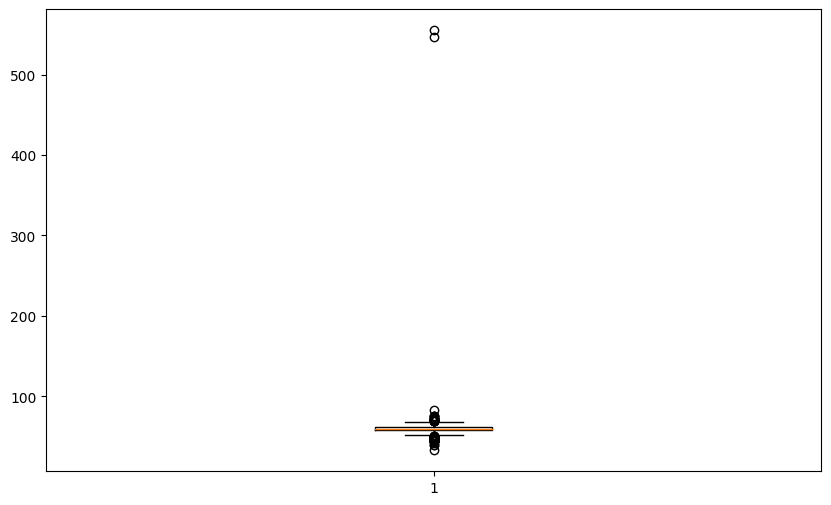

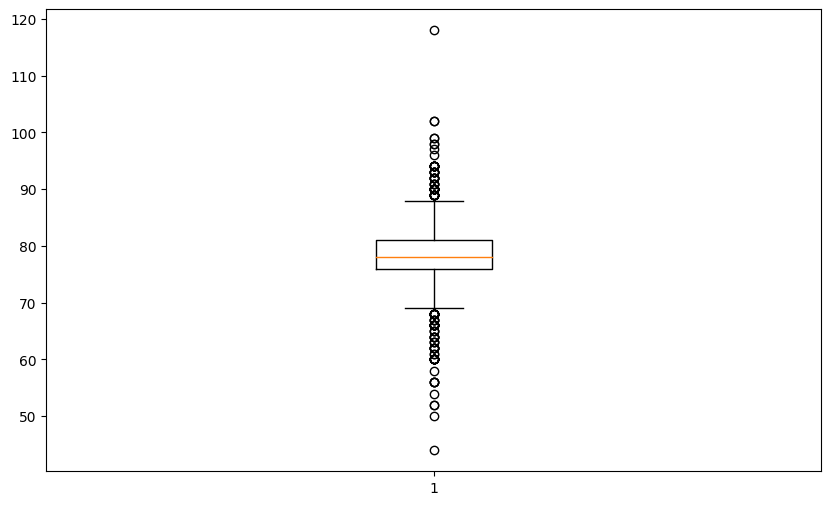

In [12]:
# plot the distribution of Agtron
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.boxplot(df_new['whole-bean_Agtron'])
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(df_new['ground-bean_Agtron'])
plt.show()








In [13]:
# from the boxplot, most of the data are beteeen 1 to 100, a few are out of this range.
# we need to remove the outliers.


df_new = df_new[df_new['whole-bean_Agtron'] <= 100]
df_new = df_new[df_new['ground-bean_Agtron'] <= 100]    


df_new.describe()



,score,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,region_africa_arabia,region_caribbean,region_central_america,...,July_Avg_Temp,July_Precipitation,Est. Price USD_per_ounce,whole-bean_Agtron,ground-bean_Agtron,Roast Level_Dark,Roast Level_Light,Roast Level_Medium,Roast Level_Medium-Dark,Roast Level_Medium-Light
count,1575.000000,1575,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,...,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000
mean,93.577143,2022-12-31 15:11:32.571428608,8.913651,8.664762,8.726349,9.036825,8.236825,0.394286,0.001270,0.262222,...,-0.000126,0.002486,0.000460,59.341587,78.359365,0.000635,0.344127,0.044444,0.003175,0.607619
min,85.000000,2020-06-01 00:00:00,7.000000,7.000000,7.000000,8.000000,7.000000,0.000000,0.000000,0.000000,...,-5.194888,-0.935257,-0.456445,33.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,2021-11-01 00:00:00,9.000000,8.000000,8.000000,9.000000,8.000000,0.000000,0.000000,0.000000,...,-0.625834,-0.935257,-0.261192,58.000000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.000000,2023-02-01 00:00:00,9.000000,9.000000,9.000000,9.000000,8.000000,0.000000,0.000000,0.000000,...,-0.097619,-0.396284,-0.190684,60.000000,78.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,94.500000,2024-04-01 00:00:00,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.000000,1.000000,...,1.038042,0.269507,-0.049668,62.000000,81.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,98.000000,2025-02-01 00:00:00,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,1.000000,...,1.698310,2.235173,31.136595,75.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,1.459399,NaN,0.336527,0.513474,0.459999,0.314681,0.510788,0.488852,0.035624,0.439983,...,1.001528,1.000833,1.001860,4.221340,5.811886,0.025198,0.475234,0.206146,0.056272,0.488436


**Last, split the data into training and testing set**



In [14]:
from sklearn.model_selection import train_test_split
df_new_train, df_new_test = train_test_split(df_new, test_size=0.2, random_state=42) # 80% for training, 20% for testing


df_new_train.to_csv('coffee_data_converted_cleaned_dummy_scaled_train.csv', index=False)
df_new_test.to_csv('coffee_data_converted_cleaned_dummy_scaled_test.csv', index=False)



**Review the following questions and apply them to your dataset:** </br>
● Does my data set have any categorical data, such as Gender or day of the week? </br>
Yes, there are some categorical data, such as 'Roast Level'

● Do my features have data values that range from 0 - 100 or 0-1 or both and more? </br>
Yes, the numerical features have been standard scaled.









